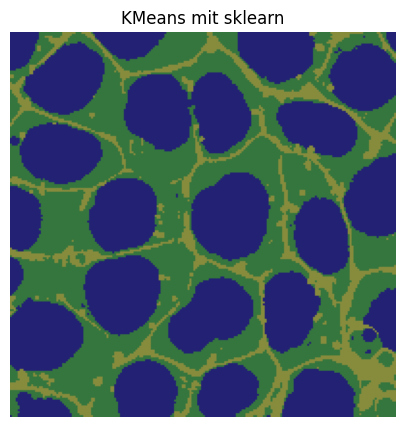

In [2]:
from PIL import Image
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt


# Bildpfad direkt als String übergeben
image_path = '/Users/davidlehmann/Downloads/Cell_Nuclei/Cell_Nuclei.tif'


# Bild korrekt laden
img = Image.open(image_path).convert('RGB')
img = img.resize((200, 200))  # Gleiche Größe für beide Methoden
img_np = np.array(img)  # NumPy-Array (H, W, 3)
height, width, _ = img_np.shape

# Pixel-Daten vorbereiten
pixels = img_np.reshape(-1, 3)

# KMeans-Clustering
k = 3
kmeans_sklearn = KMeans(n_clusters=k, random_state=42)
kmeans_sklearn.fit(pixels)

labels_sklearn = kmeans_sklearn.labels_
centers_sklearn = kmeans_sklearn.cluster_centers_
clustered_img = centers_sklearn[labels_sklearn].reshape((height, width, 3)).astype(np.uint8)

# Ergebnis anzeigen
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.imshow(clustered_img)
plt.title("KMeans mit sklearn")
plt.axis("off")
plt.show()